# **Importing Needed Libraries**

In [1]:
import warnings
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

# **Loading Dataset and Getting Information**

In [2]:
df = pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.shape

(918, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

# **Analysis**

In [7]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

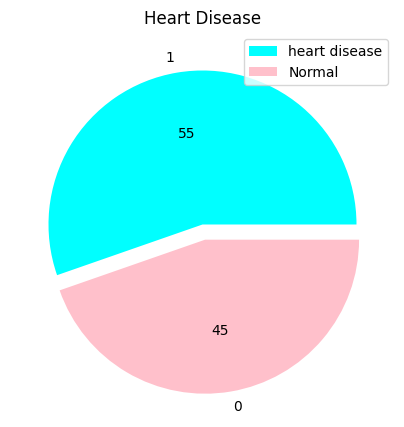

In [8]:
labels=['1','0']
count= df['HeartDisease'].value_counts()
plt.figure(figsize=(5,5))
plt.pie(count,labels=labels,autopct='%.0f',explode=(0,.1), colors=['cyan','pink'])
plt.legend( ['heart disease','Normal'],loc =1)

plt.title('Heart Disease')
plt.show()

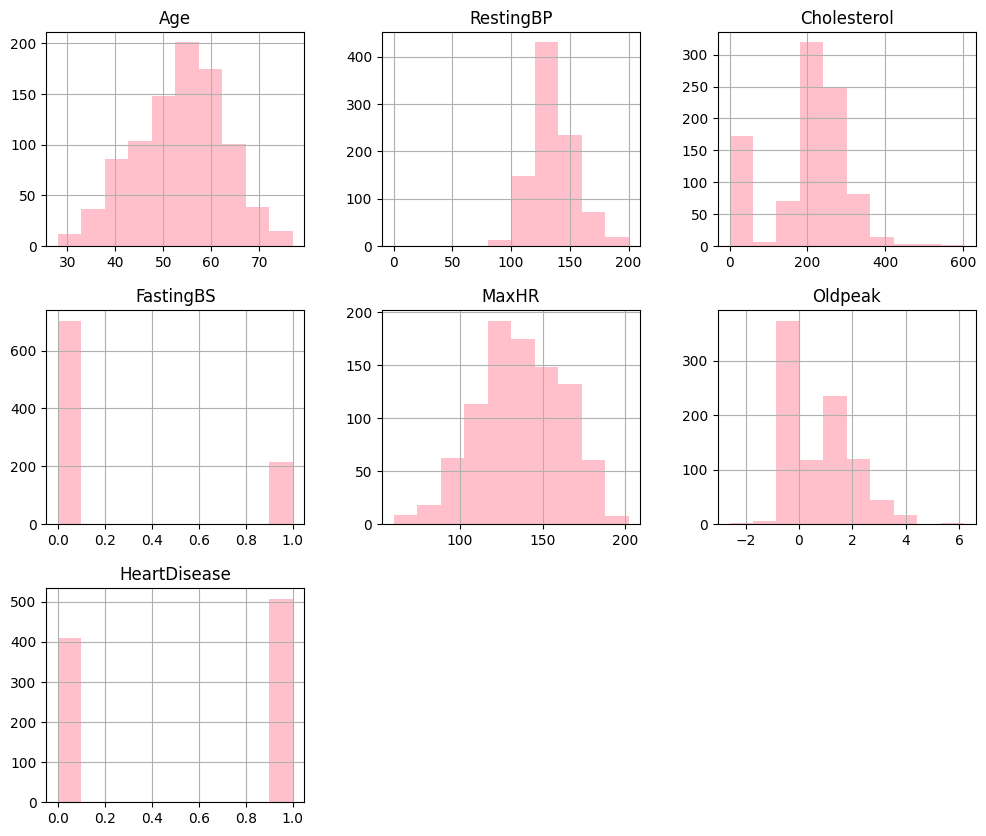

In [9]:
df.hist(figsize=(12,10), color='pink')
plt.show()

# **Processing Data**

In [10]:
lab = LabelEncoder()

In [11]:
obj = df.select_dtypes(include='object')
not_obj = df.select_dtypes(exclude='object')

In [12]:
for i in range(0, obj.shape[1]):
  obj.iloc[:,i] = lab.fit_transform(obj.iloc[:,i])

In [13]:
df_new = pd.concat([obj, not_obj], axis=1)

In [14]:
df_new.head(10)

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1,1,1,0,2,40,140,289,0,172,0.0,0
1,0,2,1,0,1,49,160,180,0,156,1.0,1
2,1,1,2,0,2,37,130,283,0,98,0.0,0
3,0,0,1,1,1,48,138,214,0,108,1.5,1
4,1,2,1,0,2,54,150,195,0,122,0.0,0
5,1,2,1,0,2,39,120,339,0,170,0.0,0
6,0,1,1,0,2,45,130,237,0,170,0.0,0
7,1,1,1,0,2,54,110,208,0,142,0.0,0
8,1,0,1,1,1,37,140,207,0,130,1.5,1
9,0,1,1,0,2,48,120,284,0,120,0.0,0


In [15]:
corr = df_new.corr()

<Axes: >

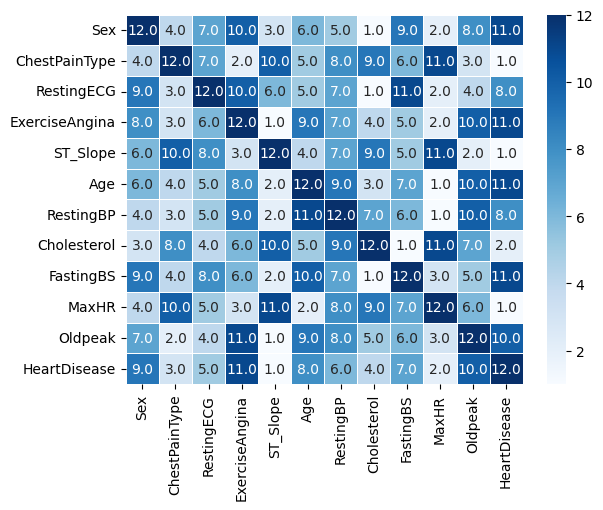

In [16]:
sns.heatmap(corr.rank(axis='columns'), annot=True,fmt='.1f',linewidth=.5, cmap="Blues")

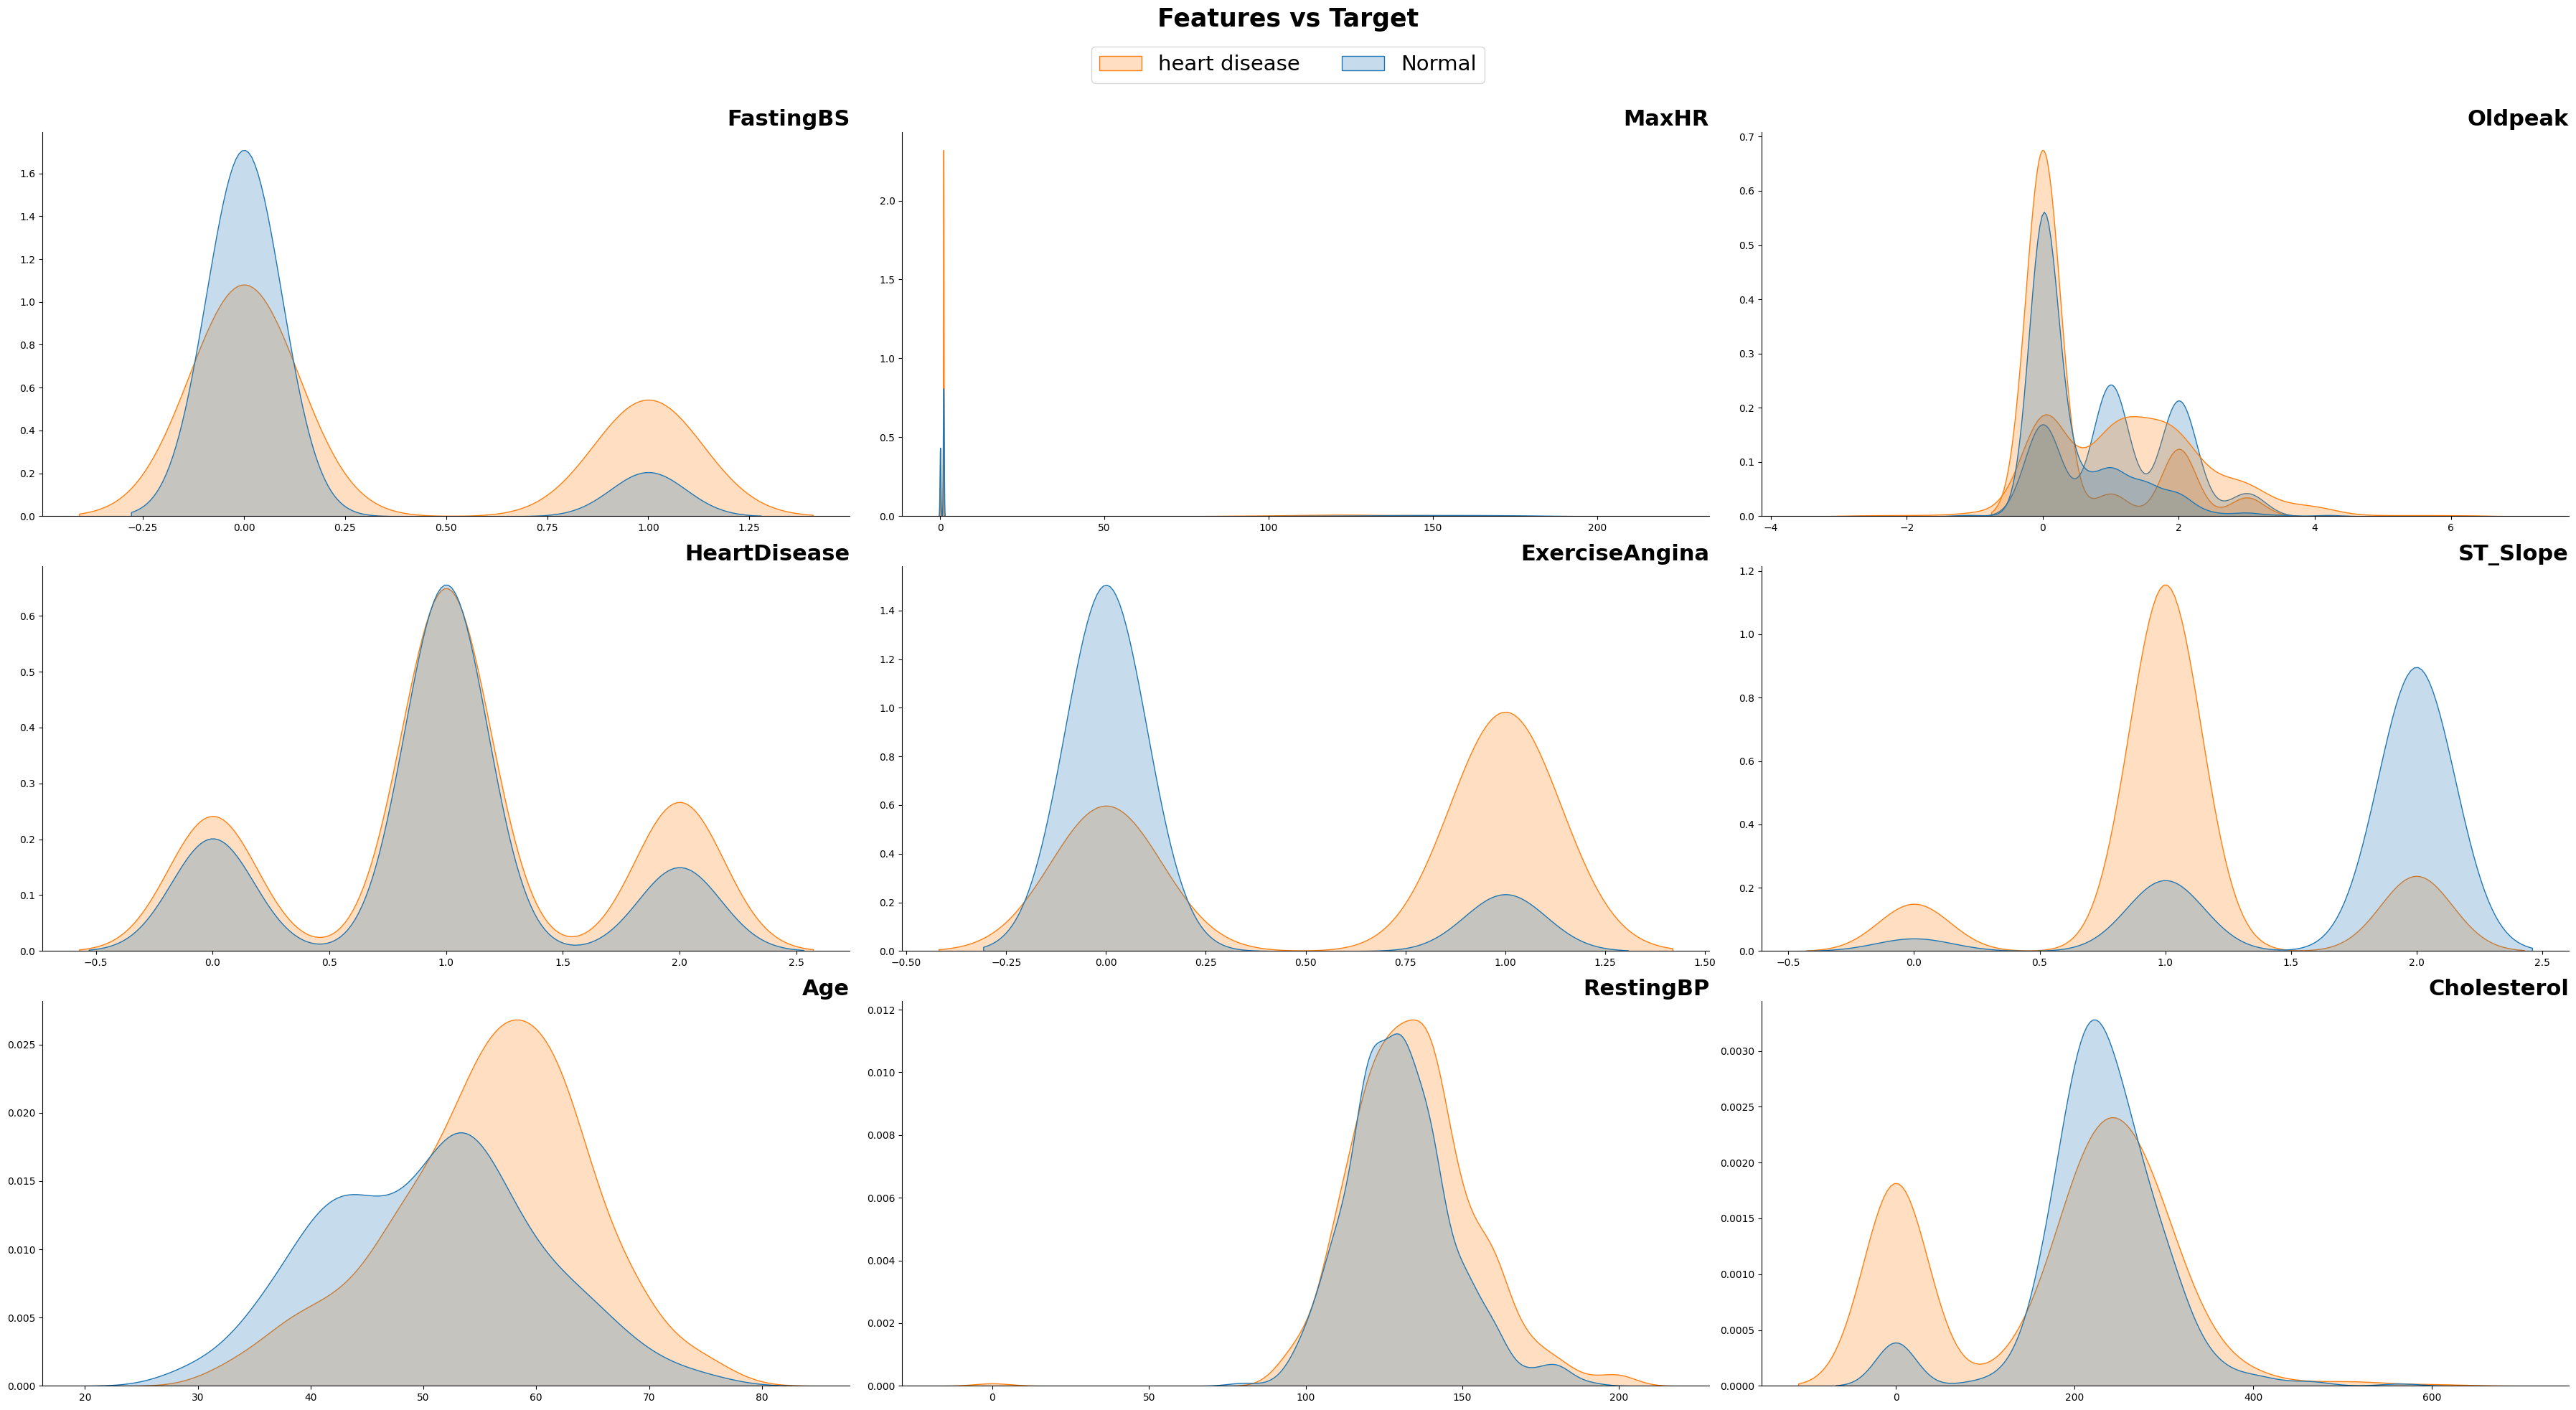

In [17]:
figsize = (6*6, 20)
fig = plt.figure(figsize=figsize)
for idx, col in enumerate(df_new[:-1], start=1):
    ax = plt.subplot(3, 3, idx % 9 + 1)
    sns.kdeplot(data=df_new, hue='HeartDisease', fill=True,x=col,  legend=False)

    ax.set_ylabel(''); ax.spines['top'].set_visible(False),
    ax.set_xlabel(''); ax.spines['right'].set_visible(False)
    ax.set_title(f'{col}', loc='right',weight='bold', fontsize=22)

fig.suptitle(f'Features vs Target\n\n\n', ha='center',  fontweight='bold', fontsize=25)
fig.legend(['heart disease','Normal'], loc='upper center', bbox_to_anchor=(0.5, 0.96), fontsize=21, ncol=3)
plt.tight_layout()
plt.show()

# **Model**

In [18]:
X = df_new.drop('HeartDisease', axis=1)
y = df_new['HeartDisease']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
Algorithm = ['RandomForestClassifier','DecisionTreeClassifier','KNeighborsClassifier','LogisticRegression','Naive Bayes']
Accuracy=[]    

In [21]:
def algorithm(model):
  model.fit(X_train, y_train)
  prediction = model.predict(X_test)

  accuracy = accuracy_score(y_test,prediction)

  print('confusion matrix')
  cm = confusion_matrix(y_test,prediction)


  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()


  print('Normalized confusion matrix')
  cm1 = confusion_matrix(y_test,prediction, normalize='true')

  group_names = ["True Negative","False Positive",'False Negative',"True Positive"]
  group_counts = ['{0:0.0f}'.format(value) for value in cm1.flatten()]
  group_percentages = ['{0:.2%}'.format(value) for value in cm1.flatten()/np.sum(cm1)]
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

  plt.title("Confusion Matrix")
  plt.xlabel('predicted label')
  plt.ylabel('True label')
  plt.show()

  print(cm)
  print(classification_report(y_test,prediction))
  final_score = accuracy*100
  print('accuracy_score : ' , final_score)

  Accuracy.append(accuracy*100)

confusion matrix


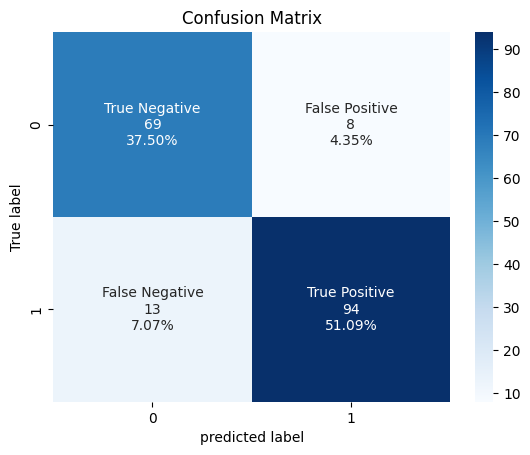

Normalized confusion matrix


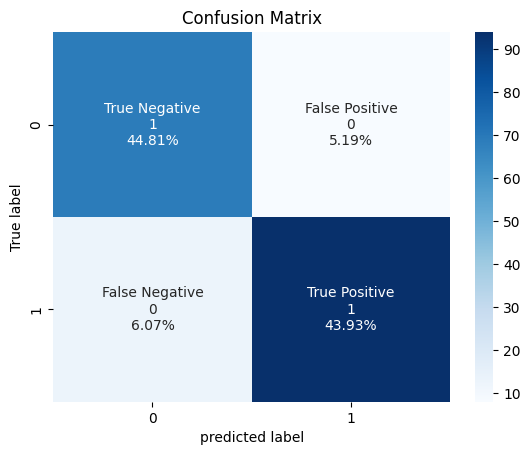

[[69  8]
 [13 94]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        77
           1       0.92      0.88      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

accuracy_score :  88.58695652173914


In [22]:
model_1 = RandomForestClassifier(n_estimators=100)
algorithm(model_1)

confusion matrix


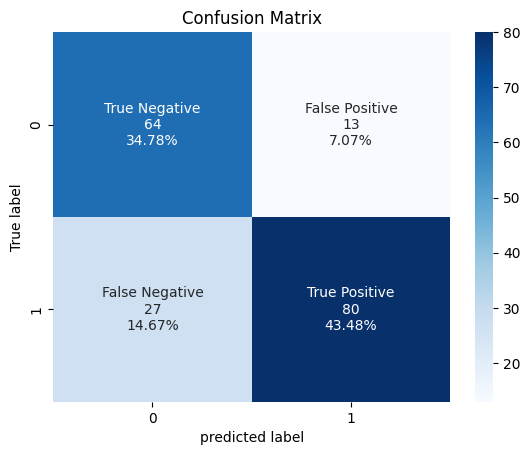

Normalized confusion matrix


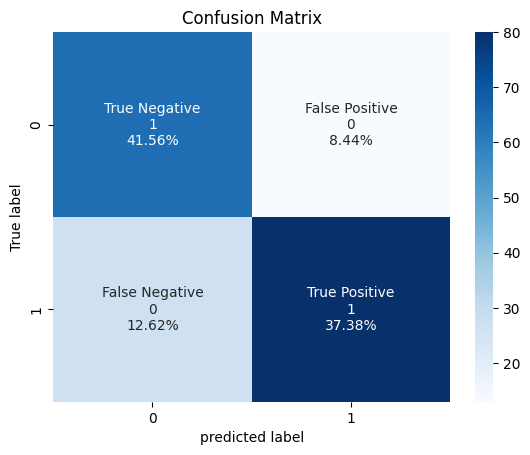

[[64 13]
 [27 80]]
              precision    recall  f1-score   support

           0       0.70      0.83      0.76        77
           1       0.86      0.75      0.80       107

    accuracy                           0.78       184
   macro avg       0.78      0.79      0.78       184
weighted avg       0.79      0.78      0.78       184

accuracy_score :  78.26086956521739


In [23]:
model_2 = DecisionTreeClassifier(random_state=42)
algorithm(model_2)

confusion matrix


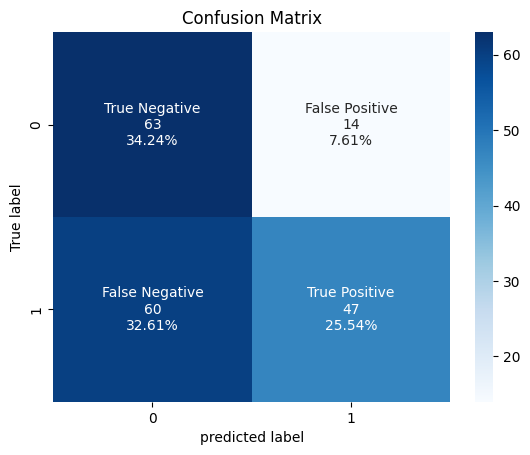

Normalized confusion matrix


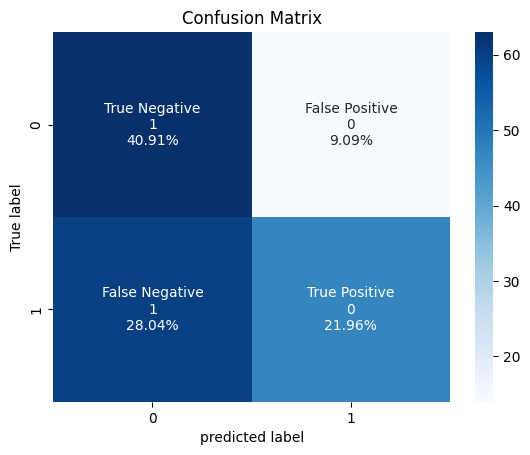

[[63 14]
 [60 47]]
              precision    recall  f1-score   support

           0       0.51      0.82      0.63        77
           1       0.77      0.44      0.56       107

    accuracy                           0.60       184
   macro avg       0.64      0.63      0.59       184
weighted avg       0.66      0.60      0.59       184

accuracy_score :  59.78260869565217


In [24]:
model_3 = KNeighborsClassifier(n_neighbors=2)
algorithm(model_3)

confusion matrix


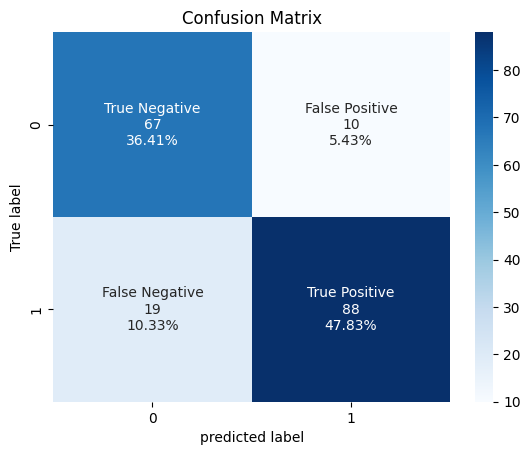

Normalized confusion matrix


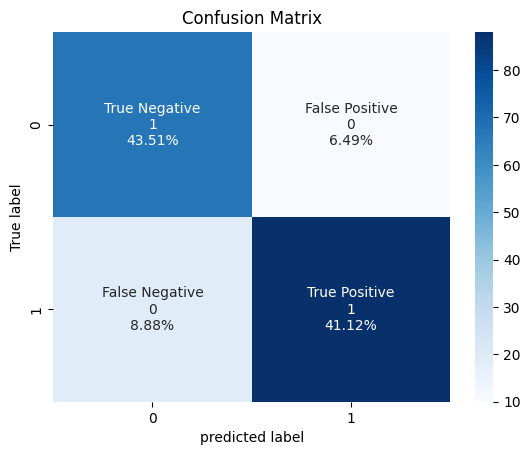

[[67 10]
 [19 88]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

accuracy_score :  84.23913043478261


In [25]:
model_4 = LogisticRegression()
algorithm(model_4)

confusion matrix


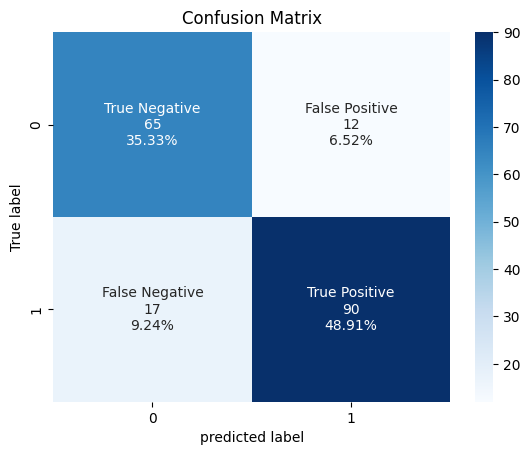

Normalized confusion matrix


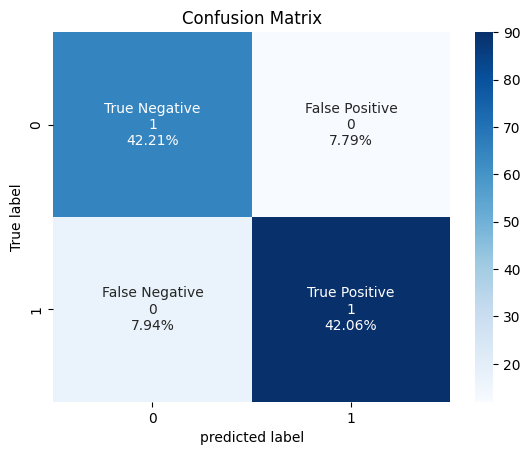

[[65 12]
 [17 90]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184

accuracy_score :  84.23913043478261


In [26]:
model_5 = GaussianNB()
algorithm(model_5)

In [27]:
score = pd.DataFrame({'Algorithm':Algorithm,'Accuracy':Accuracy })
score

,Algorithm,Accuracy
0,RandomForestClassifier,88.586957
1,DecisionTreeClassifier,78.260870
2,KNeighborsClassifier,59.782609
3,LogisticRegression,84.239130
4,Naive Bayes,84.239130


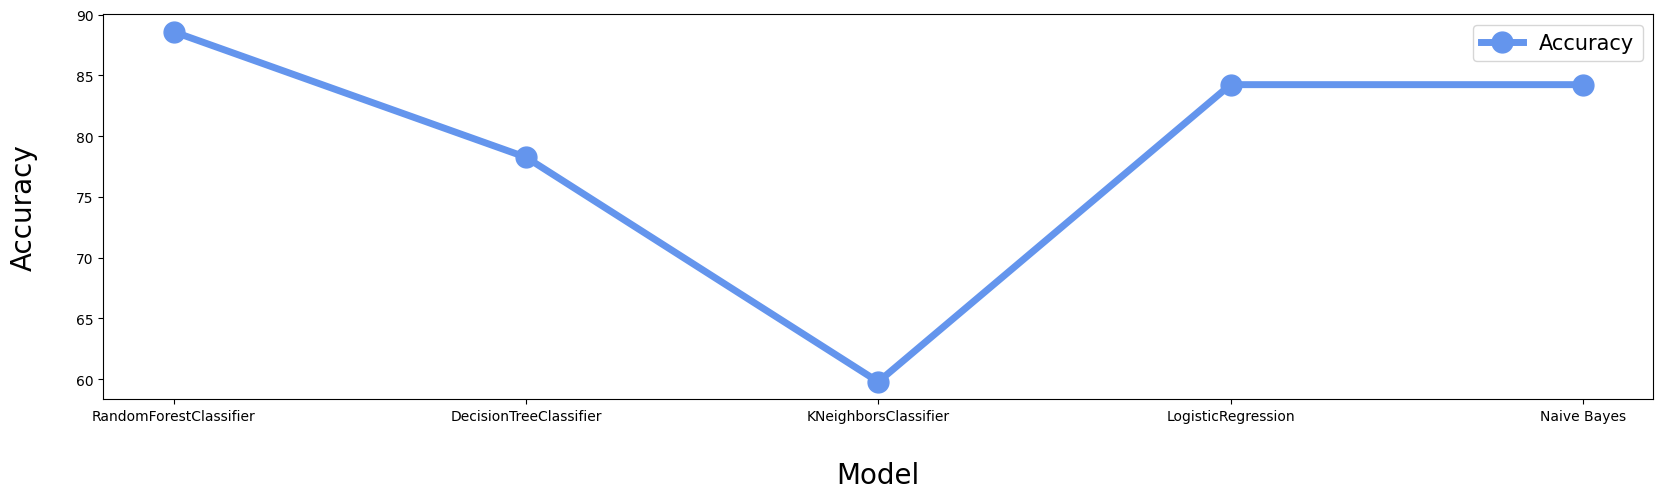

In [28]:
fig = plt.figure(figsize=(20,5))
plt.plot(score.Algorithm,score.Accuracy,label='Accuracy',lw=5,color='CornflowerBlue',marker='o',markersize = 15)
plt.legend(fontsize=15)
plt.xlabel('\nModel',fontsize= 20)
plt.ylabel('Accuracy\n',fontsize= 20)
plt.show()